---
### 【 1. 데이터 준비 】  
---

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

---
### 【 2. 산점도 표현 】  
---

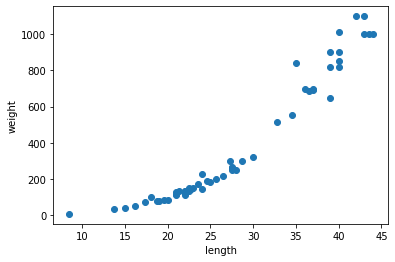

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---
### 【 3. 훈련 세트 & 테스트 세트로 나누기 】  
---

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

---  
[ reshape() ]  
<pre> >>> test_array = np.array([1, 2, 3, 4]) </pre>  
<pre> >>> print(test_array.shape)</pre>  
<pre> (4, ) </pre>  
<br>
  

<pre> >>> test_array = test_array.reshape(2, 2) </pre>  
<pre> >>> print(test_array.shape)  </pre>  
<pre> (2, 2)  </pre>  

---

In [9]:
train_input = train_input.reshape(-1, 1)      # (== train_input = train_input.reshape(42, 1))
test_input  = test_input.reshape(-1, 1)       # (== test_input  = test_input.reshape(14, 1))
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


---
### 【 4. 결정계수(R²) 】  
---

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
print(knr.score(test_input, test_target))

0.992809406101064


In [12]:
  from sklearn.metrics import mean_absolute_error

In [16]:
# 테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)

In [15]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


---
### 【 5. 과대적합 vs 과소적합 】  
---

In [20]:
# 과소적합 발생 
print(knr.score(train_input, train_target))

0.9698823289099254


In [22]:
# 과소적합을 해결하기 위해 이웃의 개수를 3으로 설정
knr.n_neighbors = 3
print(knr.score(train_input, train_target))

0.9804899950518966


In [24]:
print(knr.score(test_input, test_target))

0.9746459963987609


---
### 【 #. 연습 문제 】  
---

In [25]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

In [26]:
# 5 ~ 45까지 x 좌표 생성
x = np.arange(5, 45).reshape(-1, 1)

In [30]:
# n = 1, 5, 10일 때 예측 결과를 그래프로 그림(1)
for n in [1]:
    knr.n_neighbors = n 
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

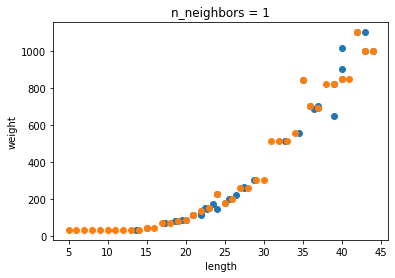

In [31]:
# 훈련 세트 & 예측 결과를 그래프로 그림
plt.scatter(train_input, train_target)
plt.scatter(x,prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
# n = 1, 5, 10일 때 예측 결과를 그래프로 그림(2)
for n in [5]:
    knr.n_neighbors = n 
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

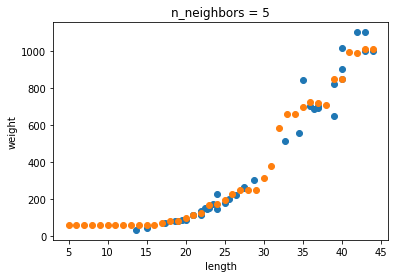

In [33]:
# 훈련 세트 & 예측 결과를 그래프로 그림
plt.scatter(train_input, train_target)
plt.scatter(x,prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
# n = 1, 5, 10일 때 예측 결과를 그래프로 그림(3)
for n in [10]:
    knr.n_neighbors = n 
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

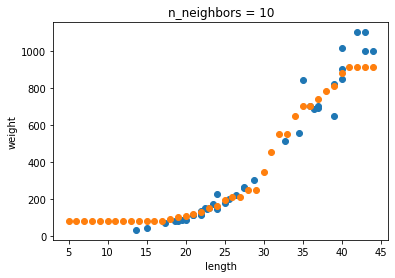

In [35]:
# 훈련 세트 & 예측 결과를 그래프로 그림
plt.scatter(train_input, train_target)
plt.scatter(x,prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()